In [260]:
using Revise, Plots, FFTW, LinearAlgebra, LaTeXStrings, Random, Distributions

In [261]:
includet("../src/SparseSpikes.jl")
using .SparseSpikes

Define ground truth amplitudes and positions

In [262]:
domain  = [[0, 1], [0, 1]]

x0 = [[0.1, 0.2, 0.7], [0.5, 0.4, 0.8]]
a0 = [2.0, -1.0, 1.5]

μ0 = DiscreteMeasure(x0, a0)

DiscreteMeasure([[0.1, 0.2, 0.7], [0.5, 0.4, 0.8]], [2.0, -1.0, 1.5], 2, 3)

In [263]:
# Define noise level
noise_level = 0.1

# Seed for noise
# Random.seed!(22)

0.1

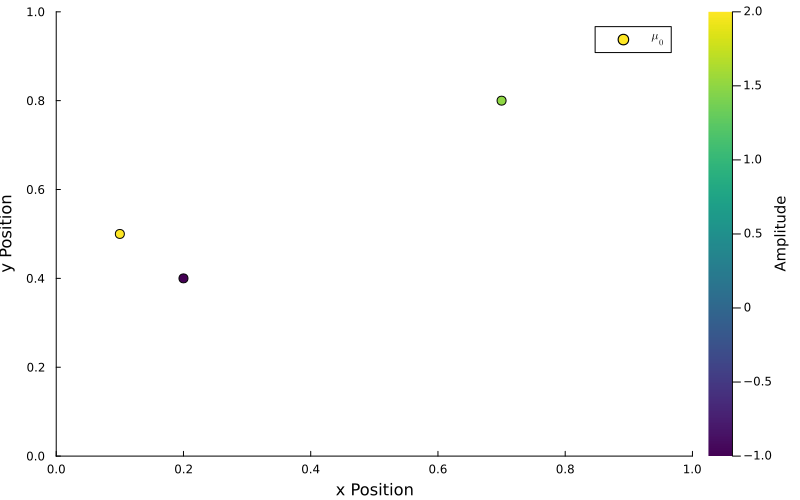

In [264]:
# Define the plot
num_points = 50

plt_grid_x1 = [domain[1][1] + i * (domain[1][2] - domain[1][1]) / num_points for j in 0:num_points, i in 0:num_points]
plt_grid_x2 = [domain[2][1] + j * (domain[2][2] - domain[2][1]) / num_points for j in 0:num_points, i in 0:num_points]

grid = range(0, stop=1, length=(num_points + 1))
plot_size = (400, 250) .* 2
plt = heatmap(xlims=domain[1], ylims=domain[2], xlabel="x Position", ylabel="y Position", color=:viridis, colorbar_title="Amplitude", size=plot_size, grid=false)

plt_gt = deepcopy(plt)
plot_spikes!(plt_gt, μ0, label=L"μ_0", colorscheme=:viridis, markersize=5, markerstrokewidth=1)

In [265]:
ops = gaussian_operators_2D(0.02, plt_grid_x1, plt_grid_x2)

Operators(var"#ϕ#281"{var"#gauss2D#280"{Matrix{Float64}, Float64}, Int64}(var"#gauss2D#280"{Matrix{Float64}, Float64}([0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 1250.0), 2601), var"#Φ#282"{var"#ϕ#281"{var"#gauss2D#280"{Matrix{Float64}, Float64}, Int64}}(var"#ϕ#281"{var"#gauss2D#280"{Matrix{Float64}, Float64}, Int64}(var"#gauss2D#280"{Matrix{Float64}, Float64}([0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 1250.0), 2601)), var"#adjΦ#283"{Matrix{Float64}, Matrix{Float64}, var"#adjΦ#279#284"{var"#ϕ#281"{var"#gauss2D#280"{Matrix{Float64}, Float64}, Int64}}}([0.0 0.02 … 0.98 1.0; 0.0 0.02 … 0.98 1.0; … ; 0.0 0.02 … 0.98 1.0; 0.0 0.02 … 0.98 1.0], [0.0 0.0 … 0.0 0.0; 0.02 0.02 … 0.02 0.02; … ; 0.98 0.98 … 0.98 0.98; 1.0 1.0 … 1.0 1.0], var"#adjΦ#279#284"{var"#ϕ#281"{var"#gauss2D#280"{Matrix{Float64}, Float64}, Int64}}(var"#ϕ#281"{var"#gauss2D#280"{Matrix{Float64}, Float64}, Int64}(var"#gauss2D#280"{Matrix{Float64}, Float64}([0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 1250.0), 2601))))

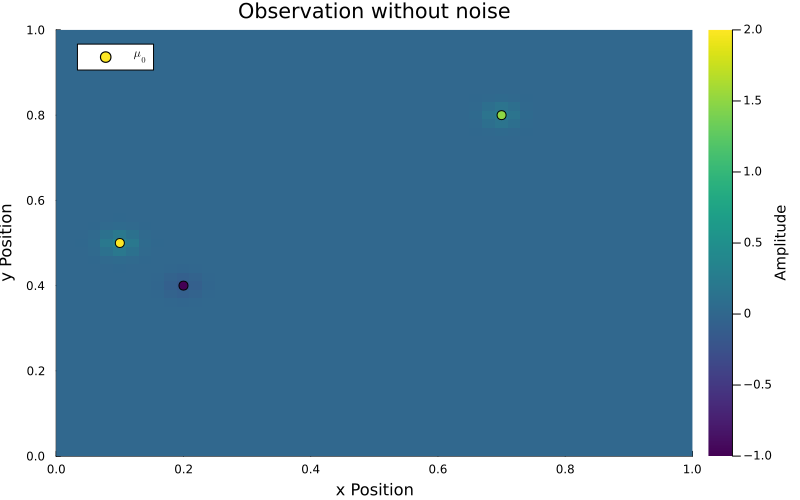

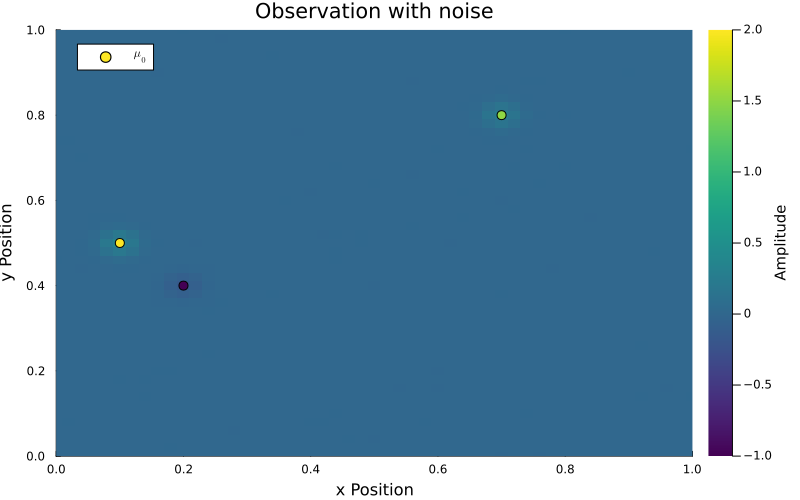

In [266]:
y0 = ops.Φ(x0[1], x0[2], a0)

# Add noise to the observation y = y0 + w
sigma = noise_level * norm(y0)
w = randn(length(y0))
w = w / norm(w) * sigma
y = y0 + w

plt_obs = deepcopy(plt)
plt_obs_noise = deepcopy(plt)

heatmap!(plt_obs, grid, grid, reshape(y0, size(plt_grid_x1)), title="Observation without noise", color=:viridis)
plot_spikes!(plt_obs, μ0, label=L"μ_0", markersize=5, markerstrokewidth=1)
display(plt_obs)
heatmap!(plt_obs_noise, grid, grid, reshape(y, size(plt_grid_x1)), title="Observation with noise", color=:viridis)
plot_spikes!(plt_obs_noise, μ0, label=L"μ_0", markersize=5, markerstrokewidth=1)

## Pre-certificate

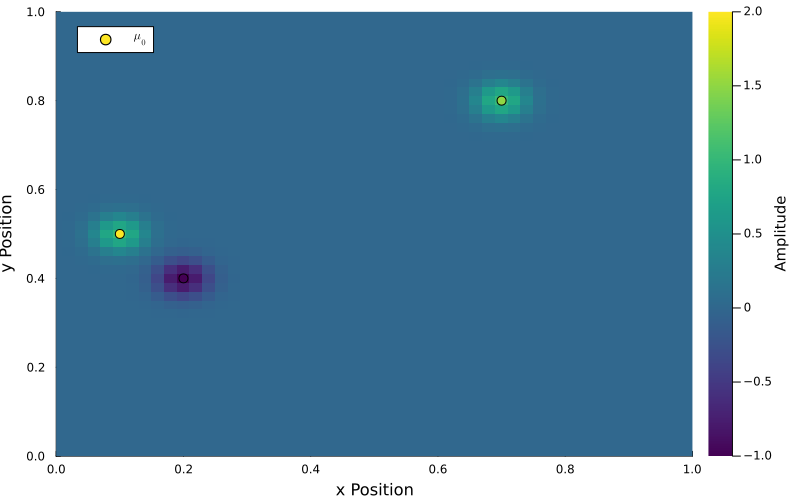

In [267]:
ηV = pre_certificate(μ0, ops)

plt_cert = deepcopy(plt)

heatmap!(plt_cert, grid, grid, ηV, color=:viridis)
plot_spikes!(plt_cert, μ0, label=L"μ_0", markersize=5, markerstrokewidth=1)

### SFW

In [268]:
# Define λ the regularisation parameter
λ = 0.07

prob = BLASSO(y, ops, domain, λ)

BLASSO([-0.0017892337365858057, -0.00023034485067744881, 0.0016999794929722604, 0.0007046849441621468, -0.0004645933395199, 0.0008407259568814427, 0.0016557149086461542, -0.0008984060699799819, 0.000817185559702788, 0.0028050689689563986  …  0.0002631671849949278, -0.0029034157036486722, -0.0018489730401143954, 0.000870512336633705, -0.0007193110607270955, 0.002567406413644347, 0.002160497170499845, 0.0007458248312582898, -0.000518988159201382, 0.0023958383092301683], Operators(var"#ϕ#281"{var"#gauss2D#280"{Matrix{Float64}, Float64}, Int64}(var"#gauss2D#280"{Matrix{Float64}, Float64}([0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 1250.0), 2601), var"#Φ#282"{var"#ϕ#281"{var"#gauss2D#280"{Matrix{Float64}, Float64}, Int64}}(var"#ϕ#281"{var"#gauss2D#280"{Matrix{Float64}, Float64}, Int64}(var"#gauss2D#280"{Matrix{Float64}, Float64}([0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 1250.0), 2601)), var"#adjΦ#283"{Matrix{Float64}, Matrix{Float64}, var"#adjΦ#279#284"{var"#ϕ#281"{var"#gauss2D#280"{Matri

In [269]:
solve!(prob, :SFW, options=Dict(:maxits => 6))

SFW iterations: 100%|███████████████████████████████████| Time: 0:00:08


BLASSO([-0.0017892337365858057, -0.00023034485067744881, 0.0016999794929722604, 0.0007046849441621468, -0.0004645933395199, 0.0008407259568814427, 0.0016557149086461542, -0.0008984060699799819, 0.000817185559702788, 0.0028050689689563986  …  0.0002631671849949278, -0.0029034157036486722, -0.0018489730401143954, 0.000870512336633705, -0.0007193110607270955, 0.002567406413644347, 0.002160497170499845, 0.0007458248312582898, -0.000518988159201382, 0.0023958383092301683], Operators(var"#ϕ#281"{var"#gauss2D#280"{Matrix{Float64}, Float64}, Int64}(var"#gauss2D#280"{Matrix{Float64}, Float64}([0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 1250.0), 2601), var"#Φ#282"{var"#ϕ#281"{var"#gauss2D#280"{Matrix{Float64}, Float64}, Int64}}(var"#ϕ#281"{var"#gauss2D#280"{Matrix{Float64}, Float64}, Int64}(var"#gauss2D#280"{Matrix{Float64}, Float64}([0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 1250.0), 2601)), var"#adjΦ#283"{Matrix{Float64}, Matrix{Float64}, var"#adjΦ#279#284"{var"#ϕ#281"{var"#gauss2D#280"{Matri

In [270]:
μ0

DiscreteMeasure([[0.1, 0.2, 0.7], [0.5, 0.4, 0.8]], [2.0, -1.0, 1.5], 2, 3)

In [271]:
prob.μ

DiscreteMeasure([[0.09992106779846757, 0.7000868995612584, 0.19995964108739966], [0.4999291932397298, 0.799814389540958, 0.4000794553550313]], [1.1292712764010244, 0.6261152393462935, -0.12431549496830535], 2, 3)

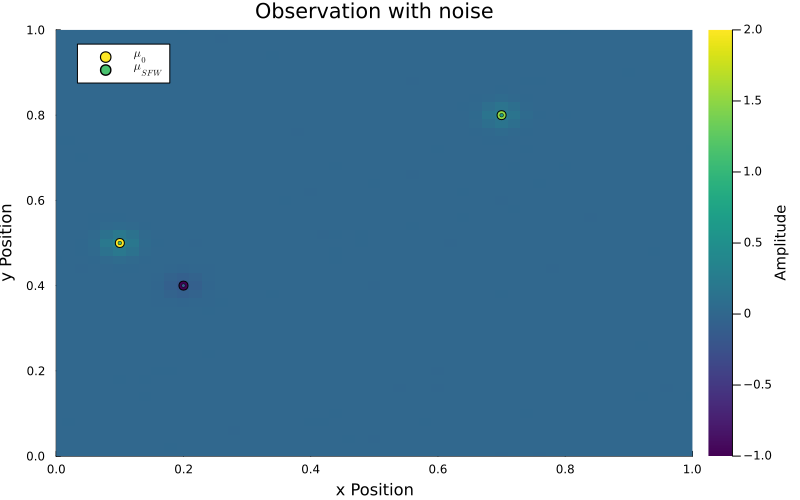

In [272]:
plt_sfw = deepcopy(plt_obs_noise)

plot_spikes!(plt_sfw, prob.μ, label=L"μ_{SFW}", marker=:circle, markersize=2, markerstrokewidth=0.5)